In [31]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

from connections import get_dataframe


In [32]:
df = get_dataframe() # database(mysql): datasets, table: `ph-student_employability-dataset`

df['CLASS'] = df['CLASS'].map({'Employable': 1, 'LessEmployable': 2})

X = df.drop(['Name of Student', 'CLASS'], axis=1)
y = df['CLASS']

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ismot', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

cv_results = cross_validate(pipeline, X, y, cv=5, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])

print("Cross-validation results:", cv_results)
print("Mean accuracy:", cv_results['test_accuracy'].mean())
print("Mean precision:", cv_results['test_precision_macro'].mean())
print("Mean recall:", cv_results['test_recall_macro'].mean())
print("Mean F1-score:", cv_results['test_f1_macro'].mean())

Cross-validation results: {'fit_time': array([0.28251052, 0.22535014, 0.26561975, 0.28130531, 0.30147433]), 'score_time': array([0.01562452, 0.01562905, 0.03124928, 0.01556945, 0.03126144]), 'test_accuracy': array([0.91289782, 0.91289782, 0.90268456, 0.91107383, 0.91442953]), 'test_precision_macro': array([0.90922338, 0.90905686, 0.89863295, 0.90751349, 0.9106972 ]), 'test_recall_macro': array([0.91391659, 0.91501048, 0.90453179, 0.91120231, 0.91631734]), 'test_f1_macro': array([0.91118105, 0.91134541, 0.90089904, 0.90913772, 0.9128992 ])}
Mean accuracy: 0.9107967128708421
Mean precision: 0.9070247746441696
Mean recall: 0.912195701937162
Mean F1-score: 0.909092484612976


classification_report:
               precision    recall  f1-score   support

           1       0.94      0.90      0.92      1729
           2       0.87      0.92      0.90      1253

    accuracy                           0.91      2982
   macro avg       0.91      0.91      0.91      2982
weighted avg       0.91      0.91      0.91      2982



Text(0.5, 23.52222222222222, 'predicted')

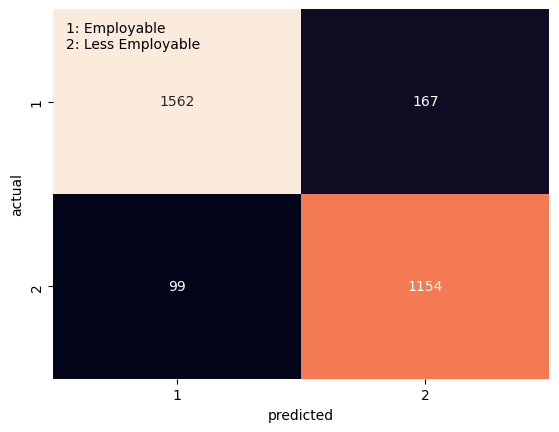

In [33]:
import matplotlib.pyplot as plt

y_pred = cross_val_predict(pipeline, X, y, cv=5)
cm = confusion_matrix(y, y_pred)

labels = np.unique(y) 
print('classification_report:\n', classification_report(y, y_pred))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cbar=0)

comment = '1: Employable\n2: Less Employable'
plt.text(0.05, 0.2, comment, wrap=True, horizontalalignment='left', fontsize=10)
plt.ylabel('actual')
plt.xlabel('predicted')

Text(0.5, 0, 'Feature Importance')

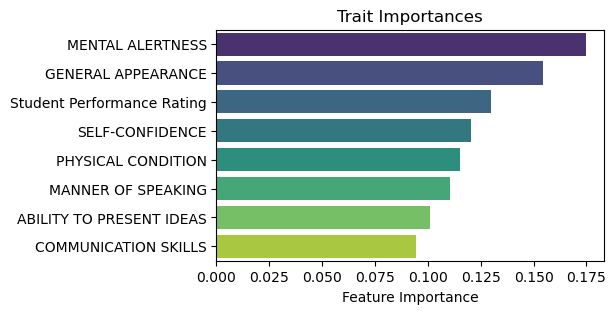

In [34]:
pipeline.fit(X, y)
rf_class = pipeline.named_steps['classifier']
importances = rf_class.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1] # sort importance


plt.figure(figsize=(5, 3))
# plt.title("Feature Importances")
plt.title("Trait Importances")
sns.barplot(x=importances[indices], y=feature_names[indices], palette="viridis")
plt.xlabel("Feature Importance")